In [2]:
%%capture
#### Load Libraries (without cell output)

import autograd.numpy as np # import autograd wrapped numpy
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics
from sklearn.preprocessing import scale

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma

In [3]:
claims = pd.read_csv("./Qualification_Package/Claims_Years_1_to_3.csv")
print(claims['claim_amount'].mean())

print(claims.shape)

1187.758451280604
(14173, 24)


In [4]:
claims.head(10)

,id_policy,year,pol_no_claims_discount,pol_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,...,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL042479,1,0.000,5,Biannual,No,WorkPrivate,M,47,22,...,zspzyfdefowgwddf,5,Diesel,Tourism,200.0,25000.0,1300.0,320,58.3,339.84
1,PL042480,1,0.000,27,Yearly,No,Retired,F,84,60,...,hselphnqlvecmmyx,1,Diesel,Tourism,158.0,13390.0,885.0,530,385.6,1236.00
2,PL042548,1,0.000,2,Biannual,No,Professional,F,37,18,...,demgvtbzilochupd,4,Gasoline,Tourism,160.0,2088.0,0.0,960,701.5,224.33
3,PL042474,1,0.000,26,Biannual,No,WorkPrivate,F,48,27,...,aywlgifrijfokyzu,1,Diesel,Tourism,182.0,11785.0,1080.0,1290,49.8,1343.41
4,PL042425,1,0.070,2,Yearly,No,WorkPrivate,F,26,8,...,ajtardhciglimsdi,3,Diesel,Tourism,250.0,25250.0,1450.0,70,30.8,130.23
5,PL042414,1,0.000,2,Monthly,No,WorkPrivate,F,33,15,...,hselphnqlvecmmyx,11,Diesel,Tourism,158.0,13390.0,885.0,10,52.9,390.03
6,PL042436,1,0.000,16,Biannual,No,WorkPrivate,M,64,46,...,xzdsapxqliboezbc,8,Diesel,Tourism,168.0,11876.0,1225.0,240,103.7,699.54
7,PL042456,1,0.000,3,Biannual,No,WorkPrivate,M,68,47,...,xpxsjmglcvcsxwdy,1,Gasoline,Tourism,170.0,11129.0,927.0,1980,218.2,381.15
8,PL042449,1,0.319,6,Biannual,No,Professional,M,43,24,...,xkzehzohmfrsmolg,1,Diesel,Commercial,148.0,16702.0,1350.0,1300,53.0,87.53
9,PL042664,1,0.000,5,Monthly,No,WorkPrivate,F,36,18,...,zspzyfdefowgwddf,4,Diesel,Tourism,200.0,25000.0,1300.0,390,396.5,670.91


In [5]:
claims.columns

Index(['id_policy', 'year', 'pol_no_claims_discount', 'pol_duration',
       'pol_pay_freq', 'pol_payd', 'pol_usage', 'drv_sex1', 'drv_age1',
       'drv_age_lic1', 'drv_drv2', 'drv_sex2', 'drv_age2', 'drv_age_lic2',
       'vh_make_model', 'vh_age', 'vh_fuel', 'vh_type', 'vh_speed', 'vh_value',
       'vh_weight', 'population', 'town_surface_area', 'claim_amount'],
      dtype='object')

In [8]:
claims.dtypes

id_policy                  object
year                        int64
pol_no_claims_discount    float64
pol_duration                int64
pol_pay_freq               object
pol_payd                   object
pol_usage                  object
drv_sex1                   object
drv_age1                    int64
drv_age_lic1                int64
drv_drv2                   object
drv_sex2                   object
drv_age2                  float64
drv_age_lic2              float64
vh_make_model              object
vh_age                      int64
vh_fuel                    object
vh_type                    object
vh_speed                  float64
vh_value                  float64
vh_weight                 float64
population                  int64
town_surface_area         float64
claim_amount              float64
dtype: object

In [ ]:
claims['pol_pay_freq'] = claims['pol_pay_freq'].replace( {'Biannual': 2, 'Yearly': 1, 'Monthly': 12, 'Quarterly': 4} )
claims['pol_payd'] = claims['pol_payd'].replace( {'No': 0, 'Yes': 1} )
claims['drv_sex1'] = claims['drv_sex1'].replace( {'M': 1, 'F': 0} )
claims['vh_type'] = claims['vh_type'].replace( {'Tourism': 1, 'Commercial': 0} )
claims['drv_drv2'] = claims['drv_drv2'].replace( {'No': 0, 'Yes': 1} )

claims.head(10)

C:\Users\kyle\AppData\Local\Temp\ipykernel_16292\3950813842.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  claims['pol_pay_freq'] = claims['pol_pay_freq'].replace( {'Biannual': 2, 'Yearly': 1, 'Monthly': 12, 'Quarterly': 4} )
C:\Users\kyle\AppData\Local\Temp\ipykernel_16292\3950813842.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  claims['pol_payd'] = claims['pol_payd'].replace( {'No': 0, 'Yes': 1} )
C:\Users\kyle\AppData\Local\Temp\ipykernel_16292\3950813842.py:3: FutureWarning: Downcasting behavior in `replace` is depr

,id_policy,year,pol_no_claims_discount,pol_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,...,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL042479,1,0.000,5,2,0,WorkPrivate,1,47,22,...,zspzyfdefowgwddf,5,Diesel,1,200.0,25000.0,1300.0,320,58.3,339.84
1,PL042480,1,0.000,27,1,0,Retired,0,84,60,...,hselphnqlvecmmyx,1,Diesel,1,158.0,13390.0,885.0,530,385.6,1236.00
2,PL042548,1,0.000,2,2,0,Professional,0,37,18,...,demgvtbzilochupd,4,Gasoline,1,160.0,2088.0,0.0,960,701.5,224.33
3,PL042474,1,0.000,26,2,0,WorkPrivate,0,48,27,...,aywlgifrijfokyzu,1,Diesel,1,182.0,11785.0,1080.0,1290,49.8,1343.41
4,PL042425,1,0.070,2,1,0,WorkPrivate,0,26,8,...,ajtardhciglimsdi,3,Diesel,1,250.0,25250.0,1450.0,70,30.8,130.23
5,PL042414,1,0.000,2,12,0,WorkPrivate,0,33,15,...,hselphnqlvecmmyx,11,Diesel,1,158.0,13390.0,885.0,10,52.9,390.03
6,PL042436,1,0.000,16,2,0,WorkPrivate,1,64,46,...,xzdsapxqliboezbc,8,Diesel,1,168.0,11876.0,1225.0,240,103.7,699.54
7,PL042456,1,0.000,3,2,0,WorkPrivate,1,68,47,...,xpxsjmglcvcsxwdy,1,Gasoline,1,170.0,11129.0,927.0,1980,218.2,381.15
8,PL042449,1,0.319,6,2,0,Professional,1,43,24,...,xkzehzohmfrsmolg,1,Diesel,0,148.0,16702.0,1350.0,1300,53.0,87.53
9,PL042664,1,0.000,5,12,0,WorkPrivate,0,36,18,...,zspzyfdefowgwddf,4,Diesel,1,200.0,25000.0,1300.0,390,396.5,670.91


In [ ]:
claims['pol_usage'].unique()

array(['WorkPrivate', 'Retired', 'Professional', 'AllTrips'], dtype=object)

In [ ]:
new = claims.drop(columns = ['id_policy','pol_usage', 'vh_make_model', 'drv_age_lic2', 'vh_fuel','drv_age2', 'drv_sex2'], axis = 1)

new = new.dropna(how='any')

new.head(10)

,year,pol_no_claims_discount,pol_duration,pol_pay_freq,pol_payd,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,vh_age,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,1,0.000,5,2,0,1,47,22,0,5,1,200.0,25000.0,1300.0,320,58.3,339.84
1,1,0.000,27,1,0,0,84,60,0,1,1,158.0,13390.0,885.0,530,385.6,1236.00
2,1,0.000,2,2,0,0,37,18,1,4,1,160.0,2088.0,0.0,960,701.5,224.33
3,1,0.000,26,2,0,0,48,27,1,1,1,182.0,11785.0,1080.0,1290,49.8,1343.41
4,1,0.070,2,1,0,0,26,8,0,3,1,250.0,25250.0,1450.0,70,30.8,130.23
5,1,0.000,2,12,0,0,33,15,1,11,1,158.0,13390.0,885.0,10,52.9,390.03
6,1,0.000,16,2,0,1,64,46,1,8,1,168.0,11876.0,1225.0,240,103.7,699.54
7,1,0.000,3,2,0,1,68,47,0,1,1,170.0,11129.0,927.0,1980,218.2,381.15
8,1,0.319,6,2,0,1,43,24,0,1,0,148.0,16702.0,1350.0,1300,53.0,87.53
9,1,0.000,5,12,0,0,36,18,1,4,1,200.0,25000.0,1300.0,390,396.5,670.91


In [ ]:
x = new.iloc[:,:-1]
y = new.iloc[:,-1:]

print(x.shape, y.shape)

x = scale(x, axis = 0)

(14125, 16) (14125, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size = 0.25, # train is 75%, test is 25% 
    random_state = 0, # stratify = y,
)

In [ ]:
k_range = range(1, 15)
scores_r = [] 

for k in k_range:
    knn_r = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn_r.fit(x_train, y_train)
    y_r_pred = knn_r.predict(x_test)
    scores_r.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_r_pred)), 2))

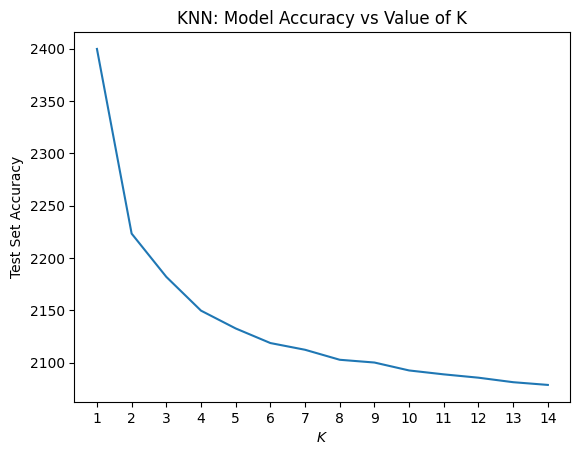

{(9, 2100.24), (3, 2182.02), (2, 2223.33), (1, 2399.65), (8, 2102.87), (10, 2092.67), (12, 2085.76), (13, 2081.46), (14, 2078.86), (11, 2088.94), (7, 2112.42), (4, 2149.78), (5, 2132.77), (6, 2118.84)}


In [ ]:
plt.plot(k_range, scores_r)
plt.title('KNN: Model Accuracy vs Value of K')
plt.xlabel(r'$K$')
plt.ylabel('Test Set Accuracy')
plt.xticks(range(1,15))
plt.show()

print(set(zip(k_range, scores_r)))

In [ ]:
r_range = range(1, 15)
scores_r = [] 

for r in r_range:
    rnc_r = neighbors.RadiusNeighborsClassifier(radius=r)
    rnc_r.fit(x_train, y_train)
    y_r_pred = rnc_r.predict(x_test)
    scores_r.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_r_pred)), 2))

c:\Users\kyle\OneDrive\Programs\Cooperators_2024\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fit(X, y)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

ValueError: x and y must have same first dimension, but have shapes (14,) and (0,)

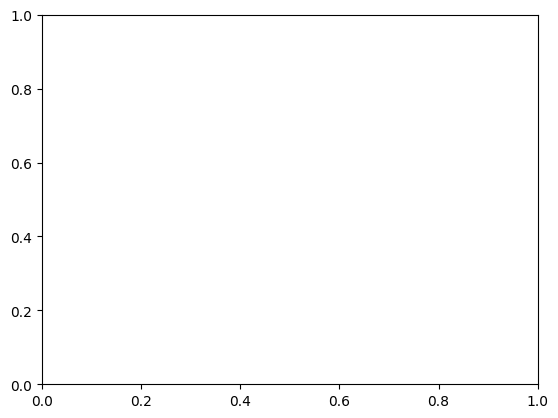

In [ ]:
plt.plot(r_range, scores_r)
plt.title('RNC: Model Accuracy vs Value of R')
plt.xlabel(r'$R$')
plt.ylabel('Test Set Accuracy')
plt.xticks(range(1,15))
plt.show()

print(set(zip(r_range, scores_r)))

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

print(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

2519.24
